In [2]:
order = [42, 41, 34, 33, 43, 44, 35, 36, 46, 45, 38, 37, 47, 48, 39, 40]


print(order)

[42, 41, 34, 33, 43, 44, 35, 36, 46, 45, 38, 37, 47, 48, 39, 40]


Sly 20231107 performance, trials with 4 repititions

C:\Users\Sihai\AppData\Local\Temp\ipykernel_11796\4130222564.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)
C:\Users\Sihai\AppData\Local\Temp\ipykernel_11796\4130222564.py:31: RuntimeWarning: invalid value encountered in divide
  cond_performance = correct_cond / overall_cond


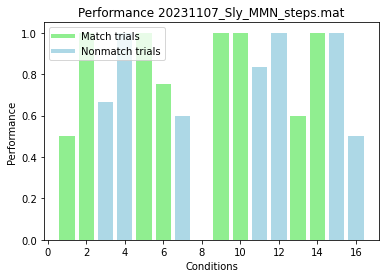

In [3]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231107_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond


plt.figure()
order = [42, 41, 34, 33, 43, 44, 35, 36, 46, 45, 38, 37, 47, 48, 39, 40]
cond_performance_ordered = [cond_performance[i-1] for i in order]

colors = ['lightgreen' if i in [1, 2, 5, 6, 9, 10, 13, 14] else 'lightblue' for i in range(1, 17)]

bars = plt.bar(range(1, 17), cond_performance_ordered, color=colors)
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)

# Adding legend with specific color
handles = [plt.Line2D([0], [0], color='lightgreen', lw=4),
           plt.Line2D([0], [0], color='lightblue', lw=4)]

labels = ['Match trials', 'Nonmatch trials']

plt.legend(handles, labels, loc='upper left')




